Implement neural network from scratch using python for the following datasets and predict the values for the following datasets:
1. Boston House prices dataset: https://www.kaggle.com/vikrishnan/boston-house-prices


### Importing Libraries

In [15]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

### Reading the Dataset

In [16]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df= pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)                                                              #load dataset
m=df.shape[0]               # m--> number of rows
n=df.shape[1]               # n--> number of columns
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [17]:
sc = StandardScaler()
df.iloc[:,:]=sc.fit_transform(df.iloc[:,:])

x_train, x_test, y_train, y_test = [i.to_numpy() for i in train_test_split(df.iloc[:,:n-1],df.iloc[:,-1],test_size=0.2)]
# 80-20 ratio split of the data and convertion to numpy array


print("Size of train_x : {}".format(x_train.shape))
print("Size of train_y : {}".format(y_train.shape))
print("Size of test_x : {}".format(x_test.shape))
print("Size of test_y : {}".format(y_test.shape))         


Size of train_x : (404, 13)
Size of train_y : (404,)
Size of test_x : (102, 13)
Size of test_y : (102,)


### Define Relu Function

In [18]:
def relu(z):
    return np.maximum(0,z)

print("Relu(5) : {}".format(relu([5,-2,3,-1,4,0,-3])))

Relu(5) : [5 0 3 0 4 0 0]


### Plotting Relu

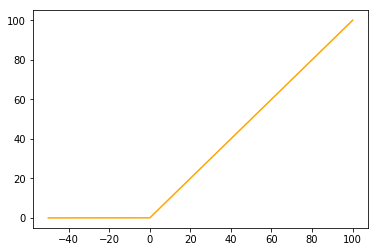

In [19]:
plt.plot(np.linspace(-50,100,5000),relu(np.linspace(-50,100,5000)),c = 'orange')

### Intializing Parameters of the Network

In [20]:
def initialize_params(layer_sizes):
    params = {} #defining paramets as dictionary which contains weights and biases as W and B in the prefix
    for i in range(1, len(layer_sizes)):
        params['W' + str(i)] = np.random.randn(layer_sizes[i], layer_sizes[i-1])*0.01
        params['B' + str(i)] = np.random.randn(layer_sizes[i],1)*0.01
    return params

params_temp = initialize_params([13,0,20,10,1])
params_temp

{'W1': array([], shape=(0, 13), dtype=float64),
 'B1': array([], shape=(0, 1), dtype=float64),
 'W2': array([], shape=(20, 0), dtype=float64),
 'B2': array([[-0.00399406],
        [-0.00685583],
        [-0.01429951],
        [-0.00513253],
        [ 0.01353976],
        [ 0.01517326],
        [ 0.00139913],
        [-0.0017223 ],
        [ 0.00401518],
        [-0.00753093],
        [-0.00113871],
        [-0.00045704],
        [-0.0055705 ],
        [-0.01484191],
        [ 0.01031235],
        [-0.00121176],
        [-0.00538155],
        [-0.01099861],
        [ 0.00262135],
        [ 0.00369671]]),
 'W3': array([[-0.01672473,  0.00147623,  0.00702098, -0.01431654, -0.00642691,
         -0.00661421, -0.01408731, -0.01415893,  0.00499077,  0.00355893,
         -0.00111549, -0.00220712, -0.00984192, -0.00667021,  0.00633958,
          0.00802753,  0.0225796 , -0.01413742, -0.00596282,  0.00654514],
        [-0.00184926, -0.007882  , -0.00708145,  0.00558351,  0.01288233,
         -0.

###  Forward Propagation

In [21]:
def forward_propagation(X_train, params):
    layers = len(layer_sizes)-1 # Defining the number of layers
    values = {} #defining as dictionary to store the values of Z and Activations required for the backpropagations
    
    for i in range(1, layers+1):
        if i==1: #for first layer, the imput is multiplied with weights and aDDED with bias
            values['Z' + str(i)] = np.dot(params['W' + str(i)], X_train) + params['B' + str(i)]
            values['A' + str(i)] = relu(values['Z' + str(i)]) #computing activations
        else:
            values['Z' + str(i)] = np.dot(params['W' + str(i)], values['A' + str(i-1)]) + params['B' + str(i)]
            if i==layers: #for last layer, activations are computed without applying relu
                values['A' + str(i)] = values['Z' + str(i)]
            else:
                values['A' + str(i)] = relu(values['Z' + str(i)])
    return values

# val = forward_propagation(x_train.T,params_temp)

### Compute Cost

In [22]:
def compute_cost(values, Y_train): #mean squared error computation
    layers = len(layer_sizes)-1
    Y_pred = values['A' + str(layers)]
    cost = 1/(2*len(Y_train)) * (np.sum(np.square(Y_pred - Y_train)))
    return cost

###  Back Prop

In [23]:
def backward_propagation(params, values, X_train, Y_train):
    layers = len(layer_sizes)-1
    m = len(Y_train)
    grads = {}
    for i in range(layers,0,-1):
        if i==layers: #for last layer dz = da as no relu non-linearity has been applied
            dA = 1/m * (values['A' + str(i)] - Y_train)
            dZ = dA
        else:
            dA = np.dot(params['W' + str(i+1)].T, dZ) #for internal layers multiply the dz of next layer with the weights
            dZ = np.multiply(dA, np.where(values['A' + str(i)]>=0, 1, 0)) # calculate dz using relu concept of backprop on da
        if i==1:
            grads['W' + str(i)] = 1/m * np.dot(dZ, X_train.T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        else:
            grads['W' + str(i)] = 1/m * np.dot(dZ,values['A' + str(i-1)].T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    return grads

###  Update Parameters with Gradients

In [24]:
def update_params(params, grads, learning_rate):
    layers = len(layer_sizes)-1
    params_updated = {}
    for i in range(1,layers+1):
        params_updated['W' + str(i)] = params['W' + str(i)] - learning_rate * grads['W' + str(i)]
        params_updated['B' + str(i)] = params['B' + str(i)] - learning_rate * grads['B' + str(i)]
    return params_updated

### Compute Test Loss

In [25]:
def compute_test_loss(x_test,y_test, params):
    values_train = forward_propagation(x_test.T, params)
    test_loss = np.sqrt(mean_squared_error(y_test, values_train['A' + str(len(layer_sizes)-1)].T))
    return test_loss

### Predicition

In [26]:
def predict(X, params):
    values = forward_propagation(X.T, params)
    predictions = values['A' + str(len(values)//2)].T
    return predictions

###  Conjuring up a Neural Net Model

In [27]:
def model(X_train, Y_train, layer_sizes, num_iters, learning_rate):
    train_loss = []
    test_loss = []
    params = initialize_params(layer_sizes)
    
    for i in range(num_iters):
        values = forward_propagation(X_train.T, params)
        
        cost = compute_cost(values, Y_train.T)
        test_cost = compute_test_loss(x_test,y_test,params)
        
        train_loss.append(cost)
        test_loss.append(test_cost)
        
        grads = backward_propagation(params, values,X_train.T, Y_train.T)
        params = update_params(params, grads, learning_rate)
        
        if(i%100 == 0):
            print("Current Learning Rate is : {}".format(learning_rate))
            print('Cost at iteration ' + str(i+1) + ' = ' + str(cost) + '\n')
            if(i!=0):
                learning_rate = learning_rate*0.95 #learning rate scheduler
    
    fig, ax = plt.subplots(1,2, figsize = (15,8))
    
    ax[0].plot(range(num_iters),train_loss)
    ax[0].set_title("training loss trend")
    ax[1].plot(range(num_iters),test_loss, color = 'red')
    ax[1].set_title("test loss trend")
    
    return params

Current Learning Rate is : 0.1
Cost at iteration 1 = 0.5055317939715686

Current Learning Rate is : 0.1
Cost at iteration 101 = 0.5055290587318775

Current Learning Rate is : 0.095
Cost at iteration 201 = 0.5055265815096981

Current Learning Rate is : 0.09025
Cost at iteration 301 = 0.5055243337493059

Current Learning Rate is : 0.0857375
Cost at iteration 401 = 0.5055222895073936

Current Learning Rate is : 0.08145062499999998
Cost at iteration 501 = 0.5055204262970254

Current Learning Rate is : 0.07737809374999999
Cost at iteration 601 = 0.5055187245639731

Current Learning Rate is : 0.07350918906249998
Cost at iteration 701 = 0.5055171672510268

Current Learning Rate is : 0.06983372960937498
Cost at iteration 801 = 0.5055157394341704

Current Learning Rate is : 0.06634204312890622
Cost at iteration 901 = 0.50551442801768

Current Learning Rate is : 0.0630249409724609
Cost at iteration 1001 = 0.5055132214777279

Current Learning Rate is : 0.05987369392383786
Cost at iteration 1101 =

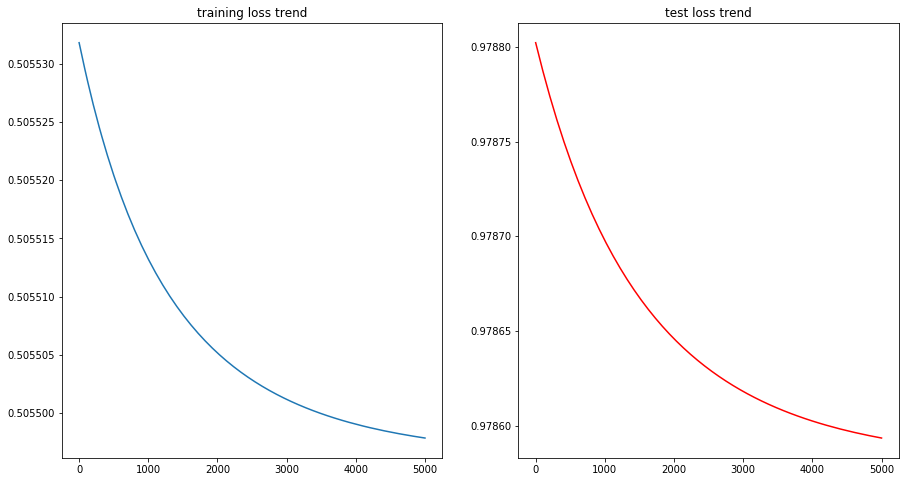

In [28]:
layer_sizes = [13, 32, 64, 32, 8, 1]            #set layer sizes ; size of the first and last layer must\
                                                #be according to the features and expected output dimensions
num_iters = 5000                                 #set number of training iterations over
learning_rate = 0.1                              #set learning rate for gradient descent
params = model(x_train, y_train, layer_sizes, num_iters, learning_rate)           #train the model on the traingin data
test_rmse= compute_test_loss(x_test, y_test, params)  #get training and test accuracy

print('Root Mean Squared Error on Testing Data = ' + str(test_rmse))

### Thank You